FEUILLE DE TP 1

---

# Modèles pour la dynamique des populations
---

Dans ce TP nous nous intéressons à différents modèles continus et discrets pour la dynamique des populations. 
Nous allons notamment visualiser les solutions pour différents jeux de paramètres et les interpréter.

In [12]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib notebook
viewer = 'matplotlib'

## Préambule : courbes paramétrées

**EXERCICE 1**

>1. Dans cet exercice on demande de tracer la courbe paramétrée $M(t)=(cos(t), sin(t))$ et d'indiquer sur le dessin quelques vecteurs vitesse. Pour cela on pourra modifier le code ci-dessous permettant de tracer la courbe $M(t)=(t^2, t^3-3t)$ et ses vecteurs de vitesse.

<IPython.core.display.Javascript object>


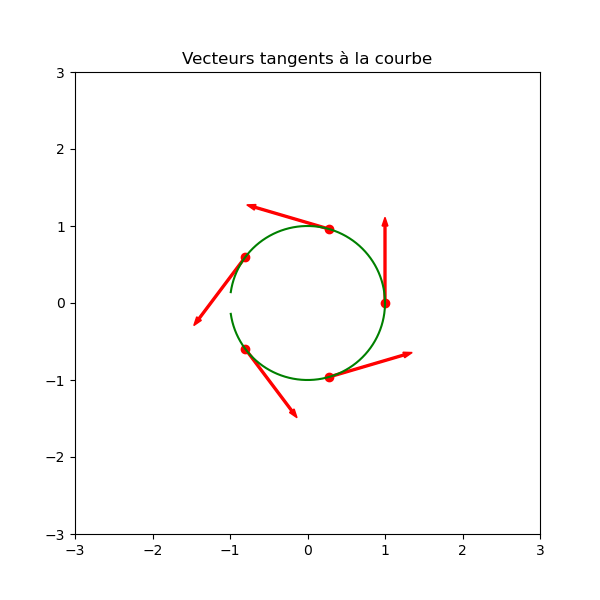

In [31]:
def x(t):
    return np.cos(t)

def y(t):
    return np.sin(t)

def dx(t):
    return -np.sin(t)

def dy(t):
    return np.cos(t)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)


ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

t = np.linspace(-3, 3, 1000)
ax.plot(x(t), y(t), color='green')

tloc_tableau = np.linspace(-5, 5,5)
for tloc in tloc_tableau:
    A = np.array([x(tloc), y(tloc)])
    v = np.array([dx(tloc), dy(tloc)])
    ax.scatter(A[0], A[1], color='red')
    v_norme = v / np.linalg.norm(v)
    ax.arrow(A[0], A[1], v_norme[0], v_norme[1], color='red', width = 0.025)

ax.set_title(f'Vecteurs tangents à la courbe')
plt.show()

> 2 (bonus). Etudier également le code ci-dessous. Il permet d'ajouter une légende précisant les valeurs du paramètre $ t $ correspondant à chacun des vecteurs de vitesse tracés (pour cela on a besoin de tracer ces différents vecteurs avec de différentes couleurs).
Ce code utilise également quelques paramètres de visualisation supplémentaires.

<IPython.core.display.Javascript object>


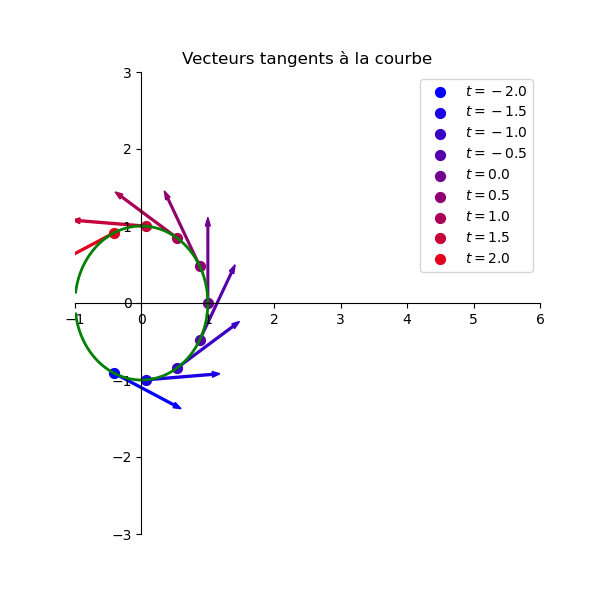

In [32]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.grid(False)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.set_xlim(-1, 6)
ax.set_ylim(-3, 3)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

t = np.linspace(-3, 3, 100)
ax.plot(x(t), y(t), linewidth=2, color='green')

tloc_tableau = np.linspace(-2, 2, 9)
for k, tloc in enumerate(tloc_tableau):
    A = np.array([x(tloc), y(tloc)])
    v = np.array([dx(tloc), dy(tloc)])
    couleur = (k/len(tloc_tableau), 0, 1-k/len(tloc_tableau))
    ax.scatter(A[0], A[1], s=50, color=couleur, alpha=1, label=f"$t={tloc}$")
    v_norme = v / np.linalg.norm(v)
    ax.arrow(A[0], A[1], v_norme[0], v_norme[1], color=couleur, width=0.025)

ax.set_title(f'Vecteurs tangents à la courbe')
ax.legend()
plt.show()


## Le modèle de Malthus

#### Description du modèle de Malthus

Le __modèle de Malthus__ stipule qu'il n'y a pas de migration et que les naissances ainsi que les décès sont proportionnels à la valeur de la population à l'instant considéré.
On écrit ce modèle sous la forme

$$ N'(t) = rN(t),$$

où $r$ désigne une constante réelle (positive ou négative), le taux de croissance de la population, avec $ r = \lambda - \mu $, où $ \lambda $ est le taux de naissance et $ \mu $ est le taux de mort.  

Cette équation différentielle peut être associée à une donnée initiale $N(0)=N_0$. Alors le *problème de Cauchy* pour le modèle de Malthus s'écrit de la façon suivante:
$$
\text{trouver $N$ t.q. }
\begin{cases}
& N'(t) = r N( t ), \quad \forall t > 0, \\
& N( 0 ) = N_0.
\end{cases}
$$

La solution de ce problème de Cauchy est simple : 

$$ N(t) = N_0 \text{e}^{r t}, \qquad t\geq0.$$

#### Représentation de la solution du modèle de Malthus

<IPython.core.display.Javascript object>


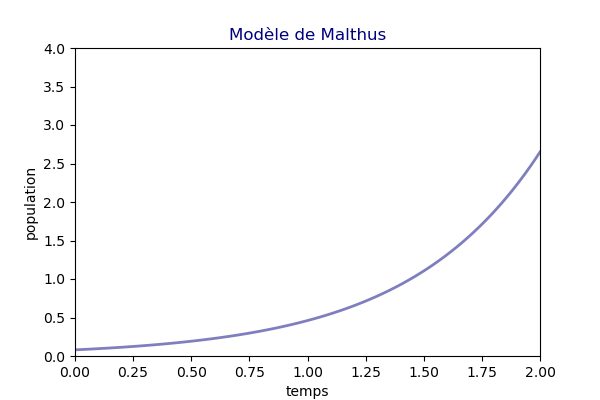

In [16]:
from lib.lib.dynamique_des_populations import Malthus
Malthus.interactive_plot(viewer = viewer)

**CHAMP DE VECTEURS D'UNE EDO**

$\newcommand{\R}{{\mathbb R}}$

Soit $f:\R \times \R\longrightarrow \R$ une fonction de classe $C^1$ et considérons l'équation différentielle

$$
(E)\ \ \ \ \ \ \ y'(t)=f(t,y(t)).
$$

On remarque que la fonction $y$ est une solution de l'équation si et seulement si le vecteur vitesse de la courbe paramétrée $M:t\mapsto (t, y(t))$ au point $M(t_0)$ est $M'(t_0) = (1,f(t_0,y(t_0)))$. La définition qui suit est donc naturelle.

On appelle __champ de vecteurs__ associé à $(E)$ l'application de $\R^2$ dans $\R^2$ définie par
$$
V(t,y)=\big(1,f(t,y)\Big).
$$

On représente le champ de vecteurs $V$ en un point $P=(t_0,y_0)$ du plan par une flèche correspondant au segment $[P,P+\varepsilon V(P)]$, avec $\varepsilon$ suffisament petit pour que le dessin reste lisible, partant de $P$ et pointant vers $P+\varepsilon V(P)$.


**EXERCICE 2**

> 1. Représentez dans un graphe le champ de vecteurs associé à l'équation différentielle du modèle de Malthus pour $r=1$.
> 2. Superposez à ce graphe plusieurs solutions pour des données initiales différentes.
> 3. Pensez à rajouter des légendes, des labels pour les axes et un titre à votre graphique.

<IPython.core.display.Javascript object>


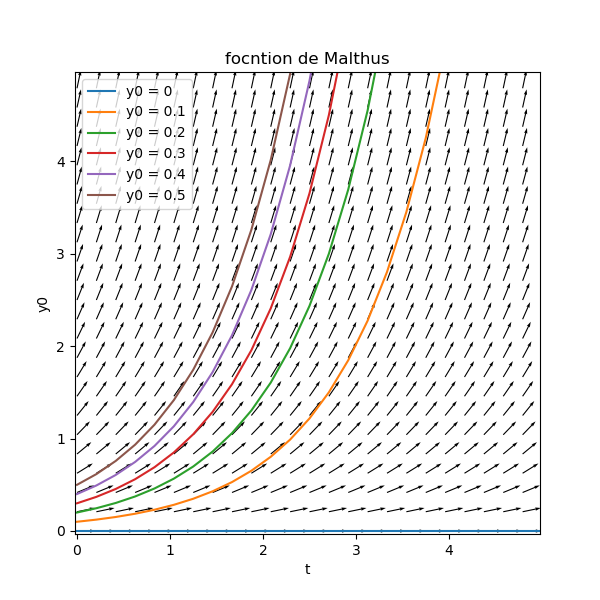

In [56]:
# COMPLETER LE CODE SUIVANT

rr = 1  # valeur du coefficient r dans le modèle de Malthus

def f(t, y):
    """fonction qui définit l'équation différentielle"""
    return rr*y

def N(t, y0):
    """Solution du problème de Malthus"""
    return y0*np.exp(rr*t)

# Commandes pour tracer le champs de vecteur

tmin, tmax = 0, 5
ymin, ymax = 0, 5
Nb = 25
t = np.linspace(tmin, tmax, Nb)
y = np.linspace(ymin, ymax, Nb)

T, Y = np.meshgrid(t, y)

U = np.ones(T.shape) / np.sqrt(1 + f(T, Y)**2)
V = f(T, Y) / np.sqrt(1 + f(T, Y)**2
                    
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.quiver(T, Y, U, V, angles='xy', color='black', scale=Nb)


for y0 in [0,0.1,0.2,0.3,0.4,0.5]:
    ax.plot(t,N(t,y0),label=f'y0 = {y0}')

ax.set_xlim(tmin, tmax)
ax.set_ylim(ymin, ymax)
ax.set_title(f"focntion de Malthus")
ax.set_xlabel(f't')
ax.set_ylabel(f'y0')
ax.legend()

## Le modèle de Verhulst

**Description du modèle de Verhulst**

Le __modèle de Verhulst__ est un modèle de croissance proposé par _Pierre François Verhulst_ en 1838 en réponse au modèle de Malthus.

Dans ce modèle, le taux de natalité et le taux de mortalité sont des fonctions affines respectivement décroissante et croissante de la taille de la population. Autrement dit, plus la taille de la population augmente, plus son taux de natalité diminue et son taux de mortalité augmente. Verhulst pose d'autre part que, lorsque les populations sont de petites tailles, elles ont tendance à croître.
Ce modèle conduit, en temps continu, à une fonction logistique.

On écrit l'équation de ce modèle sous la forme

$$ N'(t) = r \; N(t) \Bigl( 1 - \frac{N(t)}{K} \Bigr),$$

où $r$ et $K$ sont deux constantes strictement positives : $r$ est le taux de croissance (naissance - mort) et $K$ est la _charge utile_ de l'environnement ou _capacité biotique_. Cette charge utile $K$ dépend de la capacité du milieu en nourriture de soutien.

Cette équation différentielle peut être associée à une donnée initiale $N(0)=N_0$.

La solution du problème de Cauchy associé est 

$$
N(t) = \frac{K}{1 + \bigl(\frac{K}{N_0}-1\bigr) \text{e}^{-rt}}, \qquad t\geq0. 
$$

**Représentation de la solution du modèle de Verhulst**

<IPython.core.display.Javascript object>


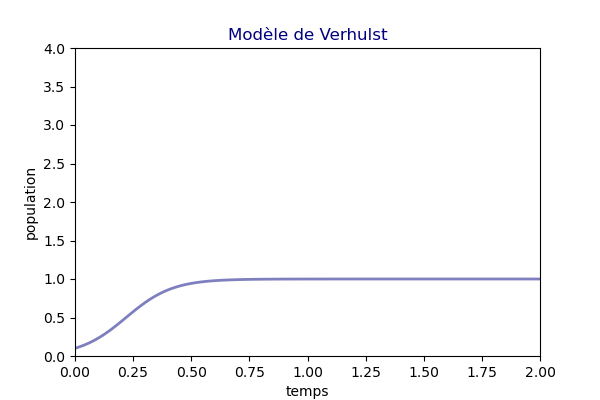

In [57]:
from lib.lib.dynamique_des_populations import Verhulst
Verhulst.interactive_plot(viewer = viewer)

**EXERCICE 3**

Dans cette question, on fixe les paramètres $r=3$ et $K=2$.

> 1. Représentez dans le plan $(t,N)$ le champ de vecteurs associé à l'équation différentielle sur $N$.
> 2. Superposez les graphes de plusieures solutions pour des données initiales différentes.
> 3. Modifiez la valeur de $r$ pour essayer de comprendre son influence sur le modèle.

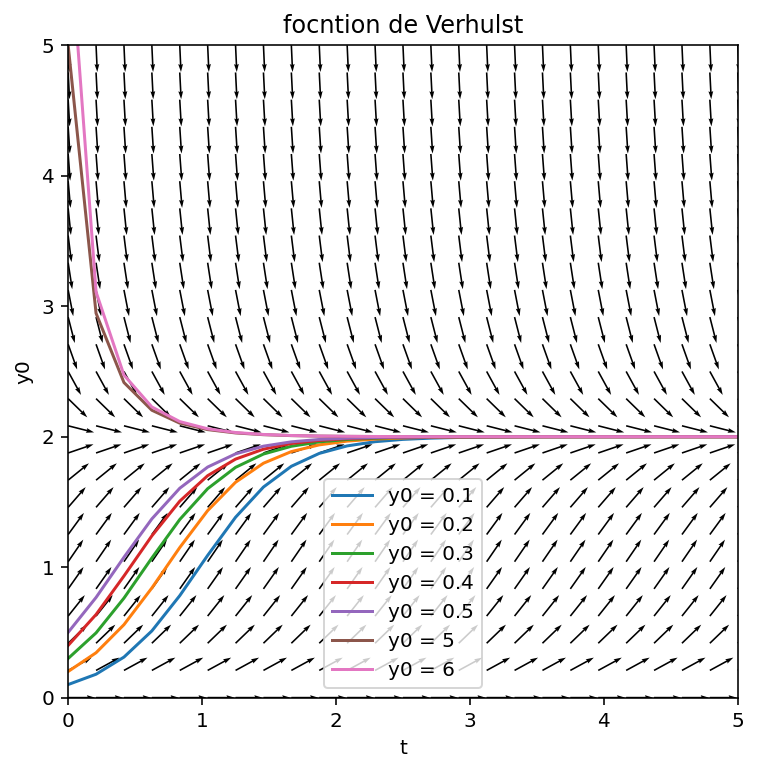

In [90]:
r2 = 3 # valeur du coefficient r dans le modèle de Verhulst
K = 2   # valeur du coefficient K dans le modèle de Verhulst 

def f2(t, y):
    """fonction qui définit l'équation différentielle"""
    return r2*y*(1-y/K)

def N2(t, y0):
    """Solution du problème de Verhulst"""
    return 𝐾/(1+(𝐾/y0 - 1)*np.exp(-r2*t))

# Commandes pour tracer le champs de vecteur

t2min, t2max = 0, 5
y2min, y2max = 0, 5
Nb2 = 25
t2 = np.linspace(t2min, t2max, Nb2)
y2 = np.linspace(y2min, y2max, Nb2)

T2, Y2 = np.meshgrid(t2, y2)

U2 = np.ones(T2.shape) / np.sqrt(1 + f2(T2, Y2)**2)
V2 = f2(T2, Y2) / np.sqrt(1 + f2(T2, Y2)**2)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.quiver(T2, Y2, U2, V2, angles='xy', color='black', scale=Nb)


for y20 in [0.1,0.2,0.3,0.4,0.5,5,6]:
    ax.plot(t2,N2(t2,y20),label=f'y0 = {y20}')

ax.set_xlim(tmin, tmax)
ax.set_ylim(ymin, ymax)
ax.set_title(f"focntion de Verhulst")
ax.set_xlabel(f't')
ax.set_ylabel(f'y0')
ax.legend()



## Résolution approchée

Afin de calculer une solution approchée d'un problème de Cauchy, nous pouvons utiliser différents schémas numériques. Nous verrons ultérieurement comment les construire et étudier leurs propriétés.

D'une manière générale, la résolution numérique d'une équation différentielle commence par le choix d'un pas de temps $\Delta t>0$. On chercher ensuite à calculer une solution approchée aux instants $t^n = n\Delta t$, notée $y^n$ :
$$ y^n \simeq y(t^n).$$

On attend d'un schéma numérique pour la résolution d'un problème de Cauchy qu'il soit convergent, c'est-à-dire que la solution approchée converge vers la solution exacte du problème lorsque le pas de temps $\Delta t$ tend vers $0$.

### Résolution numérique du problème de Cauchy avec la méthode `odeint`

Le méthode `odeint` du package `scipy.integrate` permet de calculer rapidement et aisément une solution approchée d'un problème de Cauchy de la forme :

$$
\left\lbrace
\begin{aligned}
&y'(t) = f(t, y(t)), &&t>0,\\
&y(0) = y_0.
\end{aligned}
\right.
$$

Voir par exemple :
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html.

Essayons de l'utiliser. Nous commençons par charger tous les packages nécessaires.

In [76]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np                       # pour les numpy array
from scipy.integrate import odeint       # seulement odeint
import matplotlib.pyplot as plt          # librairie graphique

**EXERCICE 4**

> 1. Afin d'appliquer la méthode à la résolution du problème de Cauchy qui nous intéresse, définissez la fonction second membre (attention à l'ordre des arguments) :
$$ f(t,y) = r \; y \Bigl( 1 - \frac{y}{K} \Bigr).$$


In [135]:
r3 = 1
K3 = 2

def f3(y,t):
    return r3*y*(1-y/K3)


> 2. Choisissez un pas de temps $\Delta t$, un temps final $T_f$ (qui devrait normalement être un multiple de $\Delta t$) et construisez le vecteur $t = (t^0,\ldots,t^N)$ des temps discrets où la solution approchée sera calculée.
> 
> 3. Choisissez également une donnée initiale $N_0$.

In [136]:
dt = 2
Tf = 20

Tn = np.linspace(0,Tf,dt) 
y0 = 0.1


> 4. Construisez la solution approchée à l'aide de la fonction `odeint` et tracez la ainsi que la solution exacte dans une fenêtre graphique. 

Pour le tracé, choisissez des symboles (un carré et un cercle par exemple) afin de représenter la solution seulement aux points où elle est calculée : l'interpolation linéaire qui est faite ensuite entre les points n'a rien à voir avec la méthode numérique utilisée.

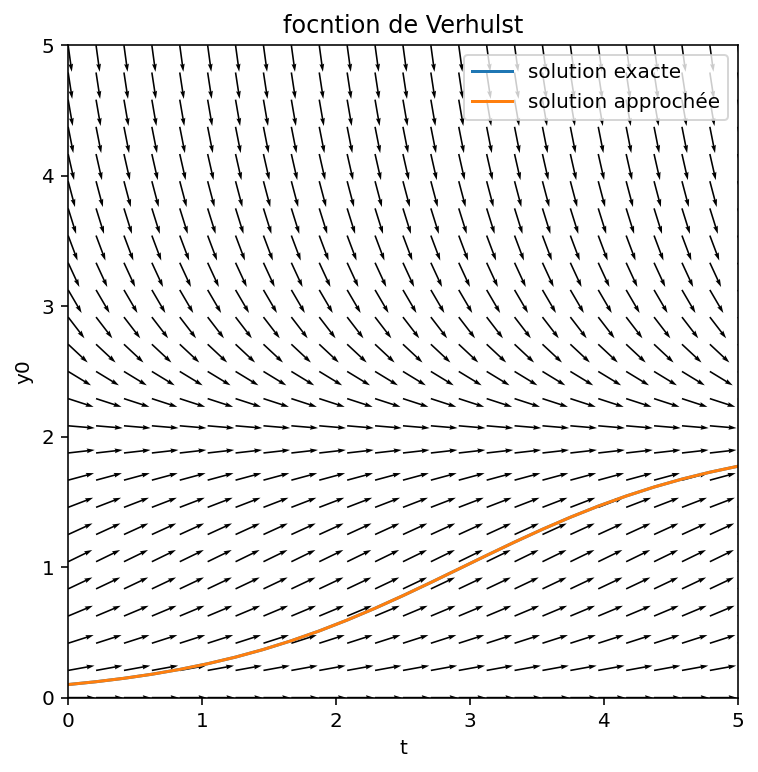

In [145]:
y_app = odeint(f3,y0,t)

def N3(t, y0):
    """Solution du problème de Verhulst"""
    return 𝐾3/(1+(𝐾3/y0 - 1)*np.exp(-r3*t))

tmin, tmax = 0, 5
ymin, ymax = 0, 5
Nb = 25
t = np.linspace(tmin, tmax, Nb)
y = np.linspace(ymin, ymax, Nb)

T, Y = np.meshgrid(t,y)

U = np.ones(T.shape) / np.sqrt(1 + f3(Y,T)**2)
V = f3(Y,T) / np.sqrt(1 + f3(Y,T)**2)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.quiver(T, Y, U, V, angles='xy', color='black', scale=Nb)


ax.plot(t,N3(t,y0),label=f'solution exacte')
ax.plot(t,y_app,label=f'solution approchée')

ax.set_xlim(tmin, tmax)
ax.set_ylim(ymin, ymax)
ax.set_title(f"focntion de Verhulst")
ax.set_xlabel(f't')
ax.set_ylabel(f'y0')
ax.legend()

## Un modèle plus complexe
Il est peu réaliste de supposer que dans un modèle décrivant la dynamique d’une population humaine la capacité d’accueil du mileu reste toujours constante. On va considérer un modèle où la capacité de milieu est affectée par des changements technologiques.
On va supposer que de nouvelles technologies augmentent l’efficacité de consommation de ressources et que elles ne se propagent pas instantanément, mais sont plutôt adoptées à un rythme variable.
Ces processus d'adoption sont souvent bien modélisés par une courbe logistique. Premièrement, le taux de l'adoption est lente, car une nouvelle technologie a des difficultés pour remplacer une technologie existante. Ensuite, le taux d'adoption augmente, généralement de façon exponentielle jusqu'à ce que les limites physiques ralentissent l'adoption. 

Nous allons modéliser la taille de la population avec une fonction $ N $ qui satisfait le problème de Cauchy:
$$ N'(t) = r_N \; N(t) \Bigl( 1 - \frac{N(t)}{C(t)} \Bigr), \quad N( 0 ) = N_0 \tag{3}$$
avec $ C $, la capacité d'accueil du milieu, solution du problème suivant:
$$C'(t) =r ( C - K_* ) \Bigl( 1 - \frac{ C - K_* }{ K } \Bigr), \quad C( t_{fl} ) = K_0 + K_*, \tag{4} $$
où $ r, K_*, K, t_{fl}, K_0 $ sont des paramètres réels.

**EXERCICE 5 (exercice noté)**
> 1. Montrer que si $ \tilde K $ est solution de l'équation logistique (1)  vérifiant $ \tilde K( t_{fl} ) = K_0 $, alors $ C = \tilde K + K_* $ est solution de (4).
> 2. Montrer que si $ P $ est solution de (1) vérifiant $ P( 0 ) = K_0 $, alors la fonction $ \tilde K $ définie par $ \tilde K( t ) = P( t - t_{fl} ) $ est solution de (1) vérifiant $ \tilde K( t_{fl} ) = K_0 $.
> 3. En utilisant l'expression (2) de la solution exacte de l'équation (1) et le résultat des questions 1-2, montrer que la solution exacte de (4) est donnée par la formule
$$
C( t ) = K_* + \frac{K} {( 1 + ( K / K_0 - 1 ) * e^{ - r ( t - t_{fl} ) )}}.
$$

On prend les valeurs suivantes des paramètres: $K= 50$, $K_*=50$, $r = 0.1$, $ t_{fl} = 30 $, $ K_0 = 1 $. 
> 4. Tracer la courbe de $ C $ sur l'intervalle de temps $ [0, T] $ avec $ T = 130 $. Ajouter les lignes horizontales $ C = K_* $, $ C = K + K_* $ et un marqueur au point $ (t_{fl}, K_0+K_*) $, ajouter une légende. En utilisant la figure proposer une interprétation des paramètres $ K $, $ K_* $, $ r $, $ t_{fl} $, $ K_0 $.

Pour la suite on prend les valeurs des paramètres $T=130$, $ N_0 = 10 $, $r_N = 0.2$.
> 5. Construire la solution approchée du problème (3) à l'aide de la fonction `odeint` et la tracer (avec des marqueurs). 
> 6. Superposer la courbe de la fonction $t\mapsto C(t)$. Que remarquez-vous ?
> 7. Faire varier la valeur du paramètre $ N_0 $ et commentez les résultats obtenus.

## Un modèle discret

### Modèle de croissance logistique

Le modèle de Verhulst peut être considéré sous une forme discrète en temps. L'effectif de la population est alors modélisé par la suite logistique : le solde migratoire est toujours supposé nul et 

$$ 
N_{n+1} - N_n = r \, \Delta t \, N \Bigl( 1 - \frac{N}{K} \Bigr),
$$

où $K$ est la capacité biotique et $r$ le taux de croissance de la population. 

L'évolution de la population est définie par la suite discrète :

$$ 
N_{n+1} \ = \ N_n  + r \, N_n \Bigl(1- \frac{N_n}{K} \Bigr) \ ,$$

pour $N_0\ge0$ donné.


#### Etude numérique du modèle de croissance logistique discret

En posant $\mu=r+1$ et $u_{n}=\frac{r}{\mu K} \ N_{n}$, on se ramène à la suite récurrente 

$$
u_{n+1}=f_{\mu}(u_{n}),
$$ 
où

$$
f_{\mu}(x) \ = \ \mu \, x \, (1-x) \ .
$$

Cela nous ramène à l'étude du comportement de la suite $(u_{n})$ pour $\mu \in \, ]1,4]$.

> **Remarque** : il est important que la population reste toujours positive ! Cela impose donc immédiatement que  $\mu\in[0, 4]$ et donc $r\leq 3$. Cette limitation n'est pas présente dans le modèle continu.

**EXERCICE 6**

Posons 

$$l=\frac{\mu-1}{\mu} .$$

> 1. Vérifiez que $u_{n} = l$ correspond à $N_{n}=K$.

Nous supposerons que $u_{0} \in \, ]0,1]$, de sorte que la donnée initiale $N_{0}$ soit non nulle et $N_{n}\ge0$ pour $n>0$.


> 2. Observez le comportement asymptotique de la suite $(u_n)$ pour $\mu=2.5$ et pour plusieurs valeurs différentes de la donnée initiale $u_0$. Vous afficherez sur le même graphique les valeurs de $u_{n}$ en fonction de $n$ (pour $n$ variant entre $0$ et $40$) pour chacune des différentes données initales.
> 3. Supperposez la droite horizontale d'ordonnée $l=(\mu-1)/\mu$.
> 4. Recommencez pour d'autres valeurs de $\mu$ inférieures ou égales à $3$ (prenez notamment une valeur de $\mu$ inférieure à $ 1 $). Attention à bien adapter le nombre d'itérations à effectuer et à visualiser, afin d'observer correctement le comportement asymptotique de la suite.
> 5. Pouvez-vous conclure quant au comportement de la suite logistique ? 


In [ ]:
# ECRIRE LE CODE CORRESPONDANT




> 6. Faire de meme pour des valeurs de $\mu$ strictement comprises entre $3$ et $3.449$. Conclure.


In [ ]:
# ECRIRE LE CODE CORRESPONDANT


> 7. Faire de même pour des valeurs de $\mu$ strictement comprises entre $3.449$ et $3.57$. Conclure.

In [ ]:
# ECRIRE LE CODE CORRESPONDANT


> 8. Que se passe-t-il lorsque $\mu>3.57$ ? Observer particulièrement les cas $\mu=3.82833$ et $ \mu = 3.8 $. Comparer le comportement de la suite pour différentes valeurs de la donnée initiale.


In [ ]:
# ECRIRE LE CODE CORRESPONDANT


In [ ]:
# ECRIRE LE CODE CORRESPONDANT
